
# Data Preparation
This notebook purpose is to prepare the raw data to be used
The notbook includes:
* [Getting started](#getting_started)
* [First Feature Selection](#first-feature-selection)
* [Outlier remove by value](#outlier-remove-by-value)
* [A Take On The Project Boundaires](#project-goals)
* [Imputation](#Imputation)
    * [Area](#Area)
    * [Sale Price](#sale-price)
    * [Tax Class](#tax-class)
    * [Residential Units](#residential-units)
    * [Commercial Units](#commercial-units)
    * [Year Built](#year-built)
    * [Gross Square Feet](#gross-square-feet)
    * [Land-square-feet](#land-square-feet)
    * [Block](#block)
    * [Zip Code](#zip-code)
    * [Total-units](#total-units)
    * [Sale-date](#sale-date)
    * [Lot](#lot)
    * [Building-class-category](#building-class-category)
    * [Tax-class-at-time-of-sale](#tax-class-at-time-of-sale)
    * [Building-class-at-time-of-sale](#building-class-at-time-of-sale)
    * [Sale price](#sale-price)
    
* [Splitting-the-data](#splitting-the-data)
* [Categorial to Numerical](#cat-to-num)
* [Scaling](#scaling)
* [Models-run](#RFRegressor-model)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor


color = sns.color_palette()
pd.options.mode.chained_assignment = None  # default='warn'

## <a name="getting_started"></a>Getting started
Let's load the data

In [ ]:
df1 = pd.read_excel("../Data/2019/2019_bronx.xlsx")
df2 = pd.read_excel("../Data/2019/2019_brooklyn.xlsx")
df3 = pd.read_excel("../Data/2019/2019_manhattan.xlsx")
df4 = pd.read_excel("../Data/2019/2019_queens.xlsx")
df5 = pd.read_excel("../Data/2019/2019_statenisland.xlsx")

Across all years, our data is categorized by area, let's add it to the features list

In [ ]:
df1['AREA'] = 'bronx'
df2['AREA'] = 'brooklyn'
df3['AREA'] = 'manhattan'
df4['AREA'] = 'queens'
df5['AREA'] = 'statenisland'

Concating all Dataframes to 1

In [ ]:
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)


Let's have a look at our features for now

In [ ]:
list(df.columns)

['BOROUGH\n',
 'NEIGHBORHOOD\n',
 'BUILDING CLASS CATEGORY\n',
 'TAX CLASS AS OF FINAL ROLL 18/19',
 'BLOCK\n',
 'LOT\n',
 'EASE-MENT\n',
 'BUILDING CLASS AS OF FINAL ROLL 18/19',
 'ADDRESS\n',
 'APARTMENT NUMBER\n',
 'ZIP CODE\n',
 'RESIDENTIAL UNITS\n',
 'COMMERCIAL UNITS\n',
 'TOTAL UNITS\n',
 'LAND SQUARE FEET\n',
 'GROSS SQUARE FEET\n',
 'YEAR BUILT\n',
 'TAX CLASS AT TIME OF SALE\n',
 'BUILDING CLASS AT TIME OF SALE\n',
 'SALE PRICE\n',
 'SALE DATE\n',
 'AREA']

As you can see the raw data include the '\n' char in it, lets remove it

In [ ]:
df.columns = ['BOROUGH',
                  'NEIGHBORHOOD',
                  'BUILDING CLASS CATEGORY',
                  'TAX CLASS AS OF FINAL ROLL 18/19',
                  'BLOCK',
                  'LOT',
                  'EASE-MENT',
                  'BUILDING CLASS AS OF FINAL ROLL 18/19',
                  'ADDRESS',
                  'APARTMENT NUMBER',
                  'ZIP CODE',
                  'RESIDENTIAL UNITS',
                  'COMMERCIAL UNITS',
                  'TOTAL UNITS',
                  'LAND SQUARE FEET',
                  'GROSS SQUARE FEET',
                  'YEAR BUILT',
                  'TAX CLASS AT TIME OF SALE',
                  'BUILDING CLASS AT TIME OF SALE',
                  'SALE PRICE',
                  'SALE DATE',
                  'AREA']

We are going to use Google API seach by place to find valuable information on our data, lets add the FINAL_ADDRESS feature for future refrence

In [ ]:
df['FINAL_ADDRESS'] = df['ADDRESS'].apply(lambda x: x+" NYC")

The shape of our data is as follows:

In [ ]:
print(f'Data has {df.shape[0]} rows and {df.shape[1]} colummns')

Data has 83920 rows and 23 colummns


Since sale price is our target, we need a concret value, and 0 is not acceaptable, lets remove it.

In [ ]:
df = df[df["SALE PRICE"] != 0]
print(f'Data has {df.shape[0]} rows and {df.shape[1]} colummns')

Data has 57537 rows and 23 colummns


## <a name="first-feature-selection"></a>First-feature-selection:
Let's identify the reduandent features first

The number of NaN values in our data is:

In [ ]:
df.isna().sum()

BOROUGH                                      0
NEIGHBORHOOD                                 0
BUILDING CLASS CATEGORY                      0
TAX CLASS AS OF FINAL ROLL 18/19            22
BLOCK                                        0
LOT                                          0
EASE-MENT                                57537
BUILDING CLASS AS OF FINAL ROLL 18/19       22
ADDRESS                                      0
APARTMENT NUMBER                         43576
ZIP CODE                                    12
RESIDENTIAL UNITS                        14343
COMMERCIAL UNITS                         14343
TOTAL UNITS                              14343
LAND SQUARE FEET                         14343
GROSS SQUARE FEET                        14343
YEAR BUILT                                3894
TAX CLASS AT TIME OF SALE                    0
BUILDING CLASS AT TIME OF SALE               0
SALE PRICE                                   0
SALE DATE                                    0
AREA         

Lets get a better understanding of the missing values

In [ ]:
df[df.isnull().any(axis=1)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,NaN,A1,4445 PARK AVENUE,NaN,...,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,NaN,A9,2327 WASHINGTON AVENUE,NaN,...,1.0,1095.0,1260.0,1910.0,1,A9,110000,2019-12-06,bronx,2327 WASHINGTON AVENUE NYC
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,NaN,A1,1948 BATHGATE AVENUE,NaN,...,1.0,2356.0,2047.0,1901.0,1,A1,470000,2019-03-08,bronx,1948 BATHGATE AVENUE NYC
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,39,NaN,A1,2075 BATHGATE AVENUE,NaN,...,1.0,1986.0,1344.0,1899.0,1,A1,420000,2019-05-24,bronx,2075 BATHGATE AVENUE NYC
5,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,149,NaN,B1,523 EAST 171 STREET,NaN,...,2.0,2000.0,2400.0,1993.0,1,B1,505000,2019-11-14,bronx,523 EAST 171 STREET NYC
6,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,152,NaN,B1,517 EAST 171 STREET,NaN,...,2.0,2000.0,2400.0,1993.0,1,B1,630000,2019-08-20,bronx,517 EAST 171 STREET NYC
7,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2927,119,NaN,B1,1497 CROTONA PLACE,NaN,...,2.0,1900.0,2394.0,1994.0,1,B1,535000,2019-05-08,bronx,1497 CROTONA PLACE NYC
8,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2929,128,NaN,B1,559 CLAREMONT PARKWAY,NaN,...,2.0,2361.0,2394.0,1995.0,1,B1,514216,2019-02-25,bronx,559 CLAREMONT PARKWAY NYC
9,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3027,26,NaN,B2,414 EAST 178 STREET,NaN,...,2.0,2000.0,2364.0,1899.0,1,B2,365000,2019-11-21,bronx,414 EAST 178 STREET NYC
10,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3030,61,NaN,B3,4467 PARK AVENUE,NaN,...,2.0,1556.0,1494.0,1899.0,1,B3,310000,2019-04-24,bronx,4467 PARK AVENUE NYC


We can see that EASE-MENT and APARMNET NUMBER are NaN for the most part.
Let's drop them


In [ ]:
df = df.drop(['EASE-MENT', 'APARTMENT NUMBER'], axis = 1) 

## <a name="Imputation"></a>Imputation:
Now lets try and fill the missing values

In [ ]:
df.isna().sum()

BOROUGH                                      0
NEIGHBORHOOD                                 0
BUILDING CLASS CATEGORY                      0
TAX CLASS AS OF FINAL ROLL 18/19            22
BLOCK                                        0
LOT                                          0
BUILDING CLASS AS OF FINAL ROLL 18/19       22
ADDRESS                                      0
ZIP CODE                                    12
RESIDENTIAL UNITS                        14343
COMMERCIAL UNITS                         14343
TOTAL UNITS                              14343
LAND SQUARE FEET                         14343
GROSS SQUARE FEET                        14343
YEAR BUILT                                3894
TAX CLASS AT TIME OF SALE                    0
BUILDING CLASS AT TIME OF SALE               0
SALE PRICE                                   0
SALE DATE                                    0
AREA                                         0
FINAL_ADDRESS                                0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
41,2,BATHGATE,05 TAX CLASS 1 VACANT LAND,1B,3050,88,V0,2233 BATHGATE AVENUE,10457.0,0.0,...,0.0,2336.0,0.0,NaN,1,V0,450000,2019-09-06,bronx,2233 BATHGATE AVENUE NYC
43,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 1C",10457.0,NaN,...,NaN,NaN,NaN,1935.0,2,D4,58000,2019-07-18,bronx,"463 EAST 178TH STREET, 1C NYC"
44,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178 STREET, 6E",10457.0,NaN,...,NaN,NaN,NaN,1935.0,2,D4,50000,2019-03-05,bronx,"463 EAST 178 STREET, 6E NYC"
45,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 EAST 178TH STREET, 4H",10457.0,NaN,...,NaN,NaN,NaN,1941.0,2,D4,23000,2019-03-15,bronx,"495 EAST 178TH STREET, 4H NYC"
58,2,BATHGATE,29 COMMERCIAL GARAGES,4,3029,62,G7,423-425 EAST 179TH STREET,10457.0,0.0,...,0.0,2050.0,0.0,NaN,4,G7,750000,2019-04-17,bronx,423-425 EAST 179TH STREET NYC
60,2,BATHGATE,29 COMMERCIAL GARAGES,4,3037,5,G7,4390 PARK AVENUE,10457.0,0.0,...,0.0,2275.0,0.0,NaN,4,G7,200000,2019-07-25,bronx,4390 PARK AVENUE NYC
61,2,BATHGATE,29 COMMERCIAL GARAGES,4,3041,14,G7,458 CYRUS PLACE,10458.0,0.0,...,0.0,3750.0,0.0,NaN,4,G7,825000,2019-07-16,bronx,458 CYRUS PLACE NYC
65,2,BATHGATE,31 COMMERCIAL VACANT LAND,4,3041,38,V1,4697 3 AVENUE,10458.0,0.0,...,0.0,9541.0,0.0,NaN,4,V1,1,2019-12-11,bronx,4697 3 AVENUE NYC
67,2,BATHGATE,36 OUTDOOR RECREATIONAL FACILITIES,4,2923,30,Q9,4135 3 AVENUE,10457.0,0.0,...,0.0,2584.0,0.0,NaN,4,Q9,2580000,2019-09-16,bronx,4135 3 AVENUE NYC
564,2,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4730,7,V0,N/A EAST 222 STREET,10469.0,0.0,...,0.0,3123.0,0.0,NaN,1,V0,1000,2019-10-04,bronx,N/A EAST 222 STREET NYC


We can see a full linear correlation of missing values in TAX CLASS AS OF FINAL ROLL 18/19  -BUILDING CLASS AS OF FINAL ROLL 18/19
and in RESIDENTIAL UNITS - COMMERCIAL UNITS - TOTAL UNITS -LAND SQUARE FEET  - GROSS SQUARE FEET.
Further more there is a small percentage of missing values in TAX CLASS AS OF FINAL ROLL 18/19,BUILDING CLASS AS OF FINAL ROLL 18/19 & ZIP CODE.
Let's remove those, as they dont effect in a large scale

In [ ]:
df = df.dropna(subset=['ZIP CODE', 'BUILDING CLASS AS OF FINAL ROLL 18/19', "TAX CLASS AS OF FINAL ROLL 18/19"])
print(df.isna().sum())
print(f'Data has {df.shape[0]} rows and {df.shape[1]} colummns')

BOROUGH                                      0
NEIGHBORHOOD                                 0
BUILDING CLASS CATEGORY                      0
TAX CLASS AS OF FINAL ROLL 18/19             0
BLOCK                                        0
LOT                                          0
BUILDING CLASS AS OF FINAL ROLL 18/19        0
ADDRESS                                      0
ZIP CODE                                     0
RESIDENTIAL UNITS                        14321
COMMERCIAL UNITS                         14321
TOTAL UNITS                              14321
LAND SQUARE FEET                         14321
GROSS SQUARE FEET                        14321
YEAR BUILT                                3883
TAX CLASS AT TIME OF SALE                    0
BUILDING CLASS AT TIME OF SALE               0
SALE PRICE                                   0
SALE DATE                                    0
AREA                                         0
FINAL_ADDRESS                                0
dtype: int64


If you recall the unit - feet features are extremly correlated, lets recall
![image.png](attachment:image.png)

Lets inscpect our data NaNs once again

In [ ]:
df[df.isnull().any(axis=1)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
41,2,BATHGATE,05 TAX CLASS 1 VACANT LAND,1B,3050,88,V0,2233 BATHGATE AVENUE,10457.0,0.0,...,0.0,2336.0,0.0,NaN,1,V0,450000,2019-09-06,bronx,2233 BATHGATE AVENUE NYC
43,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 1C",10457.0,NaN,...,NaN,NaN,NaN,1935.0,2,D4,58000,2019-07-18,bronx,"463 EAST 178TH STREET, 1C NYC"
44,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178 STREET, 6E",10457.0,NaN,...,NaN,NaN,NaN,1935.0,2,D4,50000,2019-03-05,bronx,"463 EAST 178 STREET, 6E NYC"
45,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 EAST 178TH STREET, 4H",10457.0,NaN,...,NaN,NaN,NaN,1941.0,2,D4,23000,2019-03-15,bronx,"495 EAST 178TH STREET, 4H NYC"
58,2,BATHGATE,29 COMMERCIAL GARAGES,4,3029,62,G7,423-425 EAST 179TH STREET,10457.0,0.0,...,0.0,2050.0,0.0,NaN,4,G7,750000,2019-04-17,bronx,423-425 EAST 179TH STREET NYC
60,2,BATHGATE,29 COMMERCIAL GARAGES,4,3037,5,G7,4390 PARK AVENUE,10457.0,0.0,...,0.0,2275.0,0.0,NaN,4,G7,200000,2019-07-25,bronx,4390 PARK AVENUE NYC
61,2,BATHGATE,29 COMMERCIAL GARAGES,4,3041,14,G7,458 CYRUS PLACE,10458.0,0.0,...,0.0,3750.0,0.0,NaN,4,G7,825000,2019-07-16,bronx,458 CYRUS PLACE NYC
65,2,BATHGATE,31 COMMERCIAL VACANT LAND,4,3041,38,V1,4697 3 AVENUE,10458.0,0.0,...,0.0,9541.0,0.0,NaN,4,V1,1,2019-12-11,bronx,4697 3 AVENUE NYC
67,2,BATHGATE,36 OUTDOOR RECREATIONAL FACILITIES,4,2923,30,Q9,4135 3 AVENUE,10457.0,0.0,...,0.0,2584.0,0.0,NaN,4,Q9,2580000,2019-09-16,bronx,4135 3 AVENUE NYC
564,2,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4730,7,V0,N/A EAST 222 STREET,10469.0,0.0,...,0.0,3123.0,0.0,NaN,1,V0,1000,2019-10-04,bronx,N/A EAST 222 STREET NYC


Unfortuantly it looks like the discrepancies in those features is built-in and filling them out would only make our data dirty. It is with a heavy heart that we decided to let them go


Let's tackle the NaN in year built.
A good assumption would be to check geographical distance, meanings check if the zip code + neighrbhood has something to do with it, we take for example the zipcode 10457 and BATHGATE

In [ ]:
df.loc[(df['ZIP CODE'] == 10457.0) & (df['NEIGHBORHOOD'] == "BATHGATE")].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,43.0,43.000000,43.000000,43.0,40.000000,40.000000,40.000000,40.000000,40.000000,39.000000,43.000000,4.300000e+01
mean,2.0,3001.604651,51.651163,10457.0,1.650000,0.600000,2.250000,3340.000000,3967.425000,1939.205128,2.069767,8.737902e+05
std,0.0,60.376651,40.443308,0.0,1.511494,1.296939,1.597273,2954.499541,4106.521648,41.117405,1.334440,9.582316e+05
min,2.0,2899.000000,1.000000,10457.0,0.000000,0.000000,0.000000,899.000000,0.000000,1899.000000,1.000000,1.000000e+00
25%,2.0,2923.000000,26.500000,10457.0,0.000000,0.000000,1.000000,1980.250000,1953.000000,1901.000000,1.000000,3.767500e+05
50%,2.0,3035.000000,40.000000,10457.0,2.000000,0.000000,2.000000,2305.500000,2544.500000,1931.000000,1.000000,5.142160e+05
75%,2.0,3045.500000,66.000000,10457.0,3.000000,1.000000,3.000000,3369.250000,4748.250000,1983.500000,4.000000,8.900000e+05
max,2.0,3051.000000,152.000000,10457.0,6.000000,7.000000,7.000000,17190.000000,17955.000000,2011.000000,4.000000,3.950000e+06


In [ ]:
df.loc[(df['ZIP CODE'] == 10457.0) & (df['NEIGHBORHOOD'] == "BATHGATE")].median()

BOROUGH                           2.0
BLOCK                          3035.0
LOT                              40.0
ZIP CODE                      10457.0
RESIDENTIAL UNITS                 2.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       2.0
LAND SQUARE FEET               2305.5
GROSS SQUARE FEET              2544.5
YEAR BUILT                     1931.0
TAX CLASS AT TIME OF SALE         1.0
SALE PRICE                   514216.0
dtype: float64

It looks like the std is big, and the median is not  satisfying.
We need to find another solution.
Lets recall the pairplot between our missing values to the sale price
up to bottom - Residential units, commercial units, total units, LSF(land square feet), GSF,yearbuilt.
The X axis is the sale price in all
![image.png](attachment:image.png)

## <a name="project-goals"></a>Defining Project Goals & Boundries:
This project goal is to maximize prediction capabilites using generated features. Since searching in Google API costs money, we had a restricted budget to work on this project first hand. Thus, we decided that while not being optimale we would foucs on the Non-NaN data.

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.isna().sum()

BOROUGH                                  0
NEIGHBORHOOD                             0
BUILDING CLASS CATEGORY                  0
TAX CLASS AS OF FINAL ROLL 18/19         0
BLOCK                                    0
LOT                                      0
BUILDING CLASS AS OF FINAL ROLL 18/19    0
ADDRESS                                  0
ZIP CODE                                 0
RESIDENTIAL UNITS                        0
COMMERCIAL UNITS                         0
TOTAL UNITS                              0
LAND SQUARE FEET                         0
GROSS SQUARE FEET                        0
YEAR BUILT                               0
TAX CLASS AT TIME OF SALE                0
BUILDING CLASS AT TIME OF SALE           0
SALE PRICE                               0
SALE DATE                                0
AREA                                     0
FINAL_ADDRESS                            0
dtype: int64

OK, good. lets see how many data points we have left.

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 39428 rows and 21 colummns


## <a name="outlier-remove-by-value"></a>Outlier remove by value

### <a name="Area"></a>Area:
There are no real outliers involving this feature, lets just show them

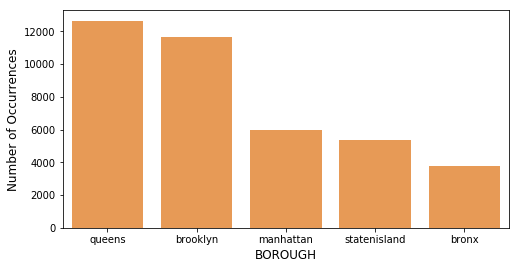

In [ ]:
int_level = df['AREA'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BOROUGH', fontsize=12)
plt.show()

### <a name="sale-price"></a>Sale Price:
This is our target, lets see what we can find by showing the histogram of prices

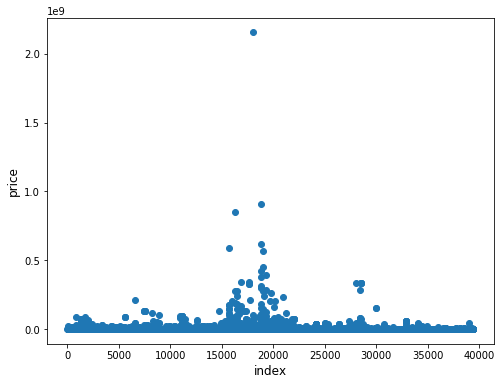

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), df['SALE PRICE'].values)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

We can see disperencies in the sale price, lets remove them

In [ ]:
def remove_outliers_zscore(df: pd.DataFrame, feature_name:str, z_threshold: float=1.96):
    mean = df[feature_name].mean()
    std = df[feature_name].std()
    dist = (df[feature_name] - mean) / std
    return df.loc[(dist > -z_threshold) & (dist < z_threshold)]

In [ ]:
df = remove_outliers_zscore(df, "SALE PRICE")

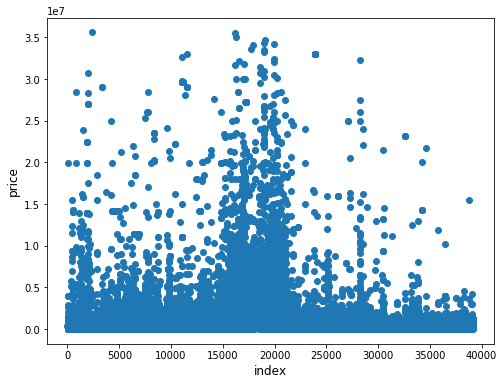

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), df['SALE PRICE'].values)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 39193 rows and 21 colummns


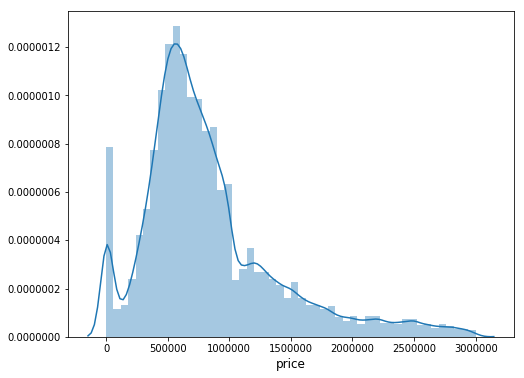

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
df = df[df['SALE PRICE'] > 100000]

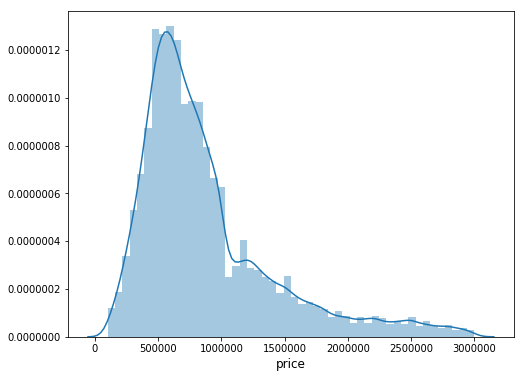

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
df = df[df['SALE PRICE'] < 2e6]

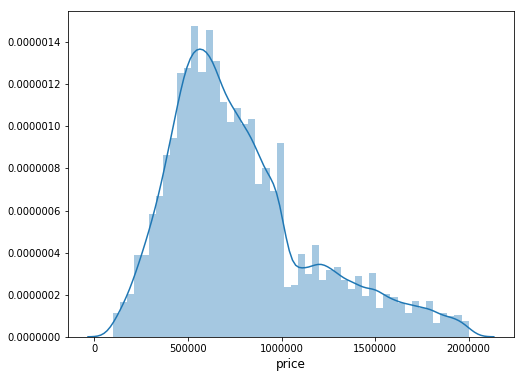

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 32153 rows and 21 colummns


### <a name="tax-class"></a>Tax Class:
Nothing much to do here

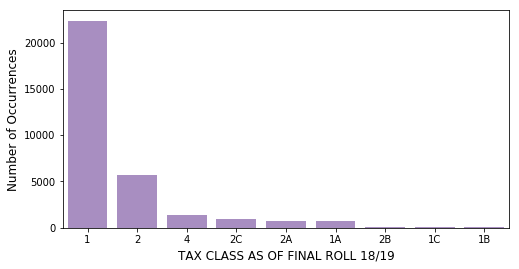

In [ ]:
int_level = df['TAX CLASS AS OF FINAL ROLL 18/19'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[4])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TAX CLASS AS OF FINAL ROLL 18/19', fontsize=12)
plt.show()

### <a name="residential-units"></a>Residential Units:

In [ ]:
uniqueValues = df['RESIDENTIAL UNITS'].unique()
print('Unique elements in column "RESIDENTIAL UNITS" ')
print(np.sort(uniqueValues))

Unique elements in column "RESIDENTIAL UNITS" 
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  24.  26.  28.  29.  30.
  32.  35.  36.  40.  45.  48.  55.  63.  77.  80. 122. 130. 142. 145.
 155. 200. 261. 285.]


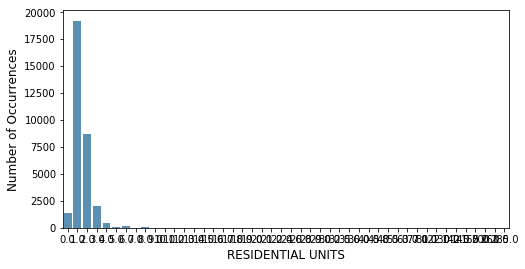

In [ ]:
cnt_srs = df['RESIDENTIAL UNITS'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RESIDENTIAL UNITS', fontsize=12)
plt.show()

In [ ]:
df = df[df['RESIDENTIAL UNITS'] < 10.0]

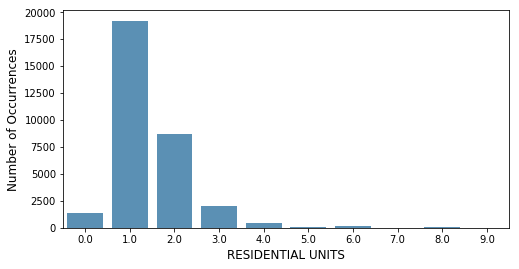

In [ ]:
cnt_srs = df['RESIDENTIAL UNITS'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RESIDENTIAL UNITS', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 32057 rows and 21 colummns


### <a name="commercial-units"></a>Commercial Units:

In [ ]:
uniqueValues = df['COMMERCIAL UNITS'].unique()
print('Unique elements in column "COMMERCIAL UNITS" ')
print(np.sort(uniqueValues))

Unique elements in column "COMMERCIAL UNITS" 
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  13.  14.  15.  20.
  35.  60.  64.  65. 133. 259.]


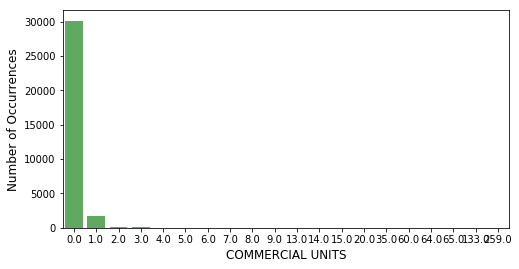

In [ ]:
cnt_srs = df['COMMERCIAL UNITS'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('COMMERCIAL UNITS', fontsize=12)
plt.show()

In [ ]:
df = df[df['COMMERCIAL UNITS'] < 5.0]

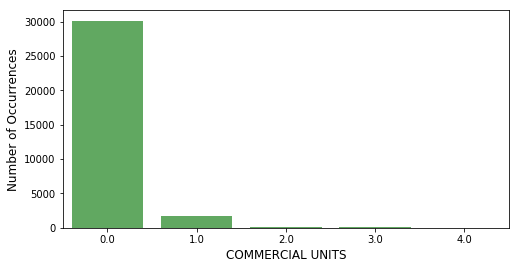

In [ ]:
cnt_srs = df['COMMERCIAL UNITS'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('COMMERCIAL UNITS', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 32023 rows and 21 colummns


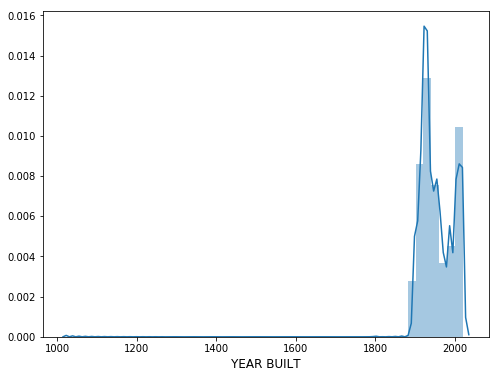

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['YEAR BUILT'].values, bins=50, kde=True)
plt.xlabel('YEAR BUILT', fontsize=12)
plt.show()

### <a name="year-built"></a>Year Built:

In [ ]:
uniqueValues = df['YEAR BUILT'].unique()
print('Unique elements in column "YEAR BUILT" ')
print(np.sort(uniqueValues))

Unique elements in column "YEAR BUILT" 
[1030. 1800. 1840. 1845. 1857. 1870. 1871. 1873. 1875. 1880. 1881. 1886.
 1890. 1892. 1893. 1895. 1897. 1899. 1900. 1901. 1902. 1903. 1904. 1905.
 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917.
 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929.
 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941.
 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953.
 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965.
 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977.
 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989.
 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001.
 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2015. 2016. 2017. 2018. 2019. 2020.]


In [ ]:
df = df[df['YEAR BUILT'] > 1860]
df = df[df['YEAR BUILT'] <= 2020]

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 32005 rows and 21 colummns


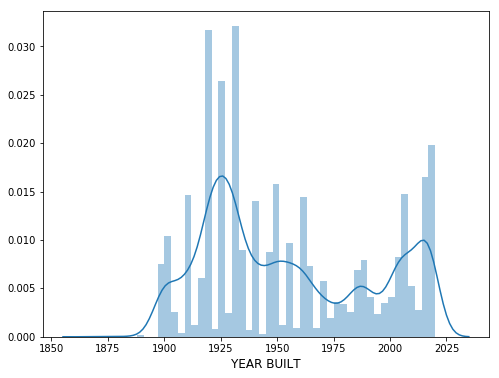

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['YEAR BUILT'].values, bins=50, kde=True)
plt.xlabel('YEAR BUILT', fontsize=12)
plt.show()

In [ ]:
df = df[df['YEAR BUILT'] > 1890]

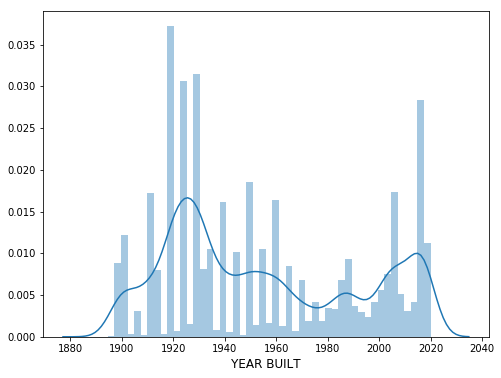

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['YEAR BUILT'].values, bins=50, kde=True)
plt.xlabel('YEAR BUILT', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 31969 rows and 21 colummns


In [ ]:
uniqueValues = df['YEAR BUILT'].unique()
print('Unique elements in column "YEAR BUILT" ')
print(np.sort(uniqueValues))

Unique elements in column "YEAR BUILT" 
[1892. 1893. 1895. 1897. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906.
 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918.
 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930.
 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942.
 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954.
 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966.
 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978.
 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990.
 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002.
 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2015. 2016. 2017. 2018. 2019. 2020.]


### <a name="gross-square-feet"></a>Gross Square Feet:

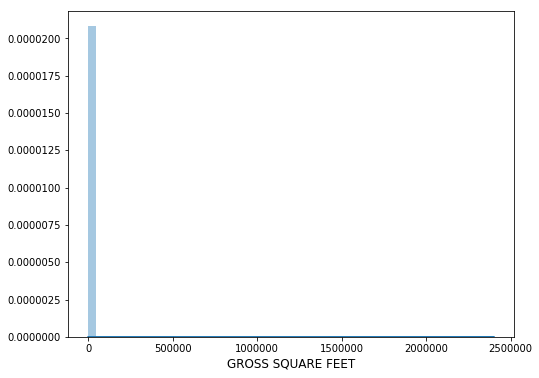

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['GROSS SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('GROSS SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
df = df[df['GROSS SQUARE FEET'] < 5000]

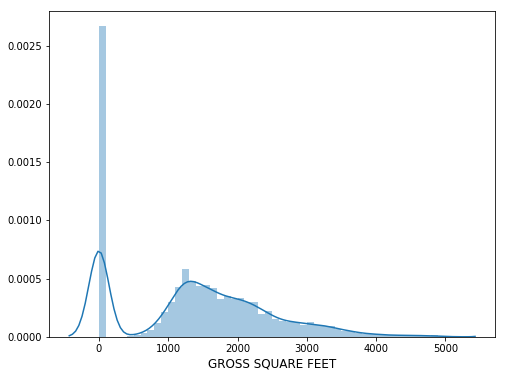

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['GROSS SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('GROSS SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
df = df[df['GROSS SQUARE FEET'] < 4600]

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 31547 rows and 21 colummns


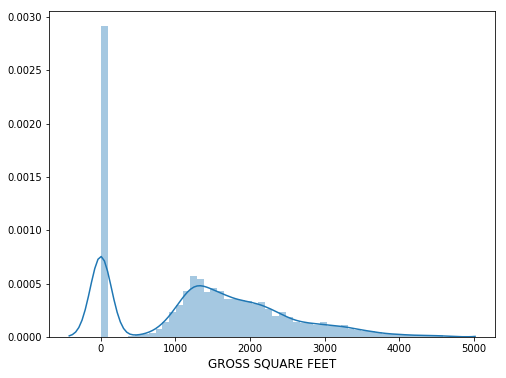

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['GROSS SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('GROSS SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
df = df[df['GROSS SQUARE FEET'] > 50]

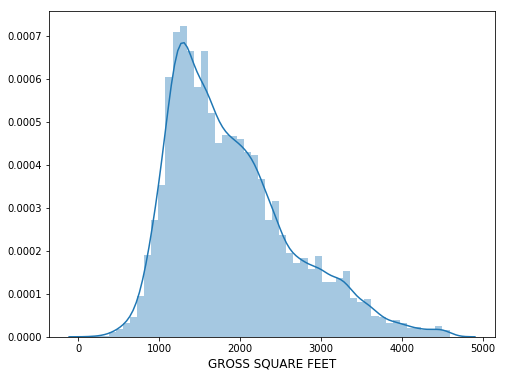

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['GROSS SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('GROSS SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 23108 rows and 21 colummns


### <a name="land-square-feet"></a>Land Square Feet:

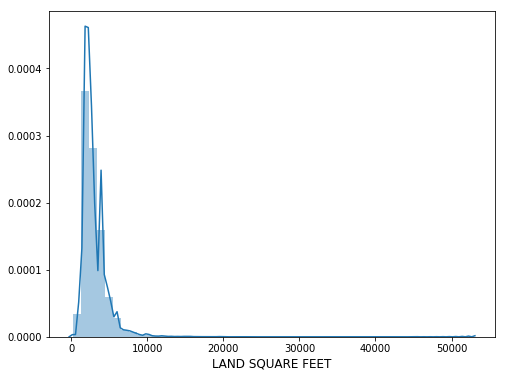

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
df = df[df['LAND SQUARE FEET'] > 200]

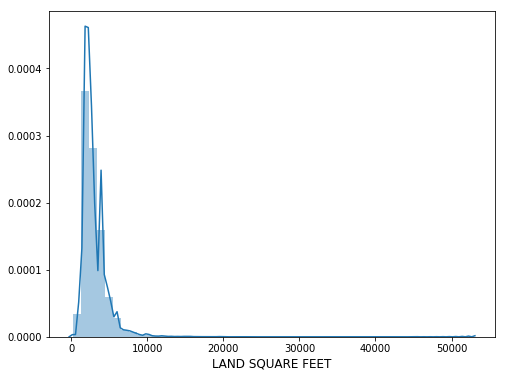

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
df = df[df['LAND SQUARE FEET'] < 7000]

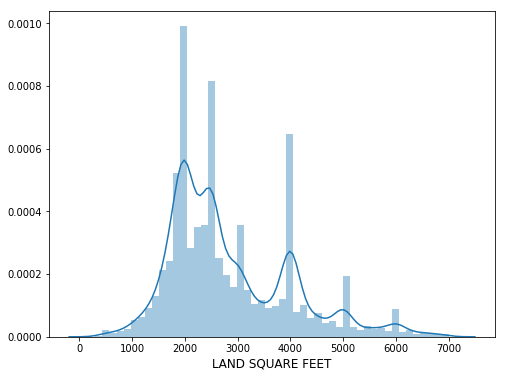

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 22501 rows and 21 colummns


In [ ]:
df = df[df['LAND SQUARE FEET'] < 6000]

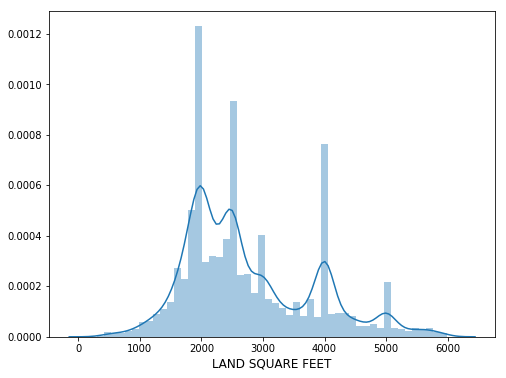

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 21990 rows and 21 colummns


In [ ]:
df = df[df['LAND SQUARE FEET'] < 5000]

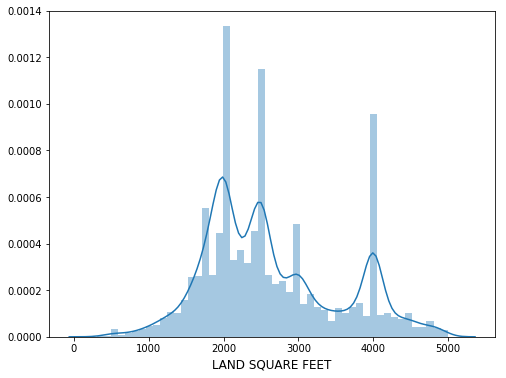

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20895 rows and 21 colummns


### <a name="block"></a>Block:

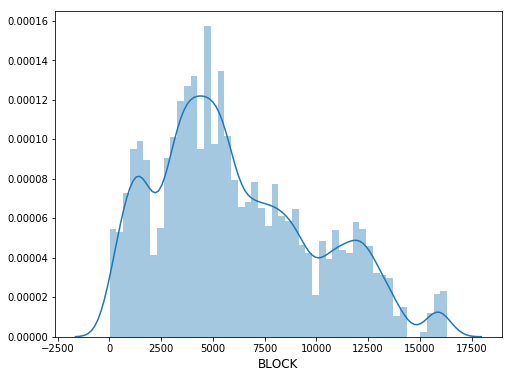

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['BLOCK'].values, bins=50, kde=True)
plt.xlabel('BLOCK', fontsize=12)
plt.show()

In [ ]:
uniqueValues = df['BLOCK'].unique()
print('Unique elements in column "BLOCK" ')
print(np.size(np.sort(uniqueValues)))

Unique elements in column "BLOCK" 
8688


### <a name="zip-code"></a>Zip Code:

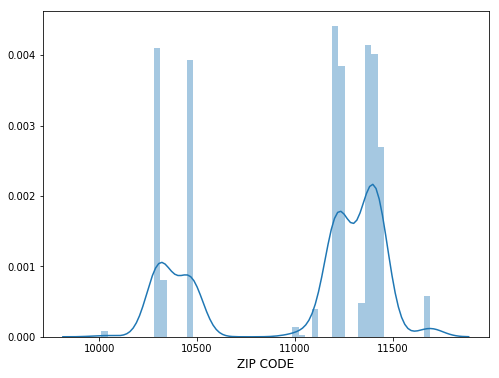

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['ZIP CODE'].values, bins=50, kde=True)
plt.xlabel('ZIP CODE', fontsize=12)
plt.show()


In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20895 rows and 21 colummns


In [ ]:
df = df[df['ZIP CODE'] > 10000]

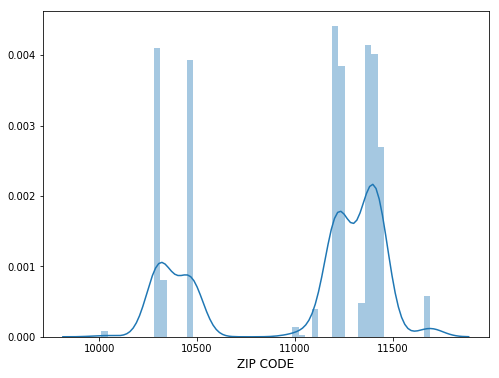

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['ZIP CODE'].values, bins=50, kde=True)
plt.xlabel('ZIP CODE', fontsize=12)
plt.show()

In [ ]:
df = df[df['ZIP CODE'] < 12000]

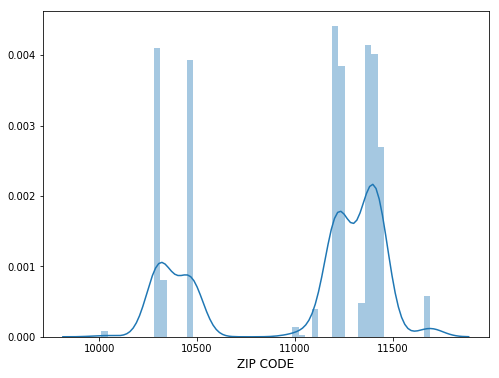

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['ZIP CODE'].values, bins=50, kde=True)
plt.xlabel('ZIP CODE', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20895 rows and 21 colummns


### <a name="total-units"></a>Total Units:

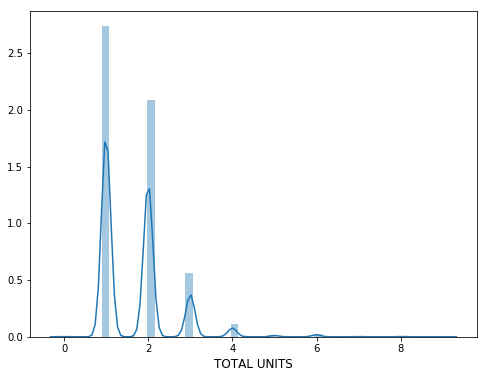

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['TOTAL UNITS'].values, bins=50, kde=True)
plt.xlabel('TOTAL UNITS', fontsize=12)
plt.show()

In [ ]:
df = df[df['TOTAL UNITS'] < 5]

In [ ]:
df = df[df['TOTAL UNITS'] > 0]

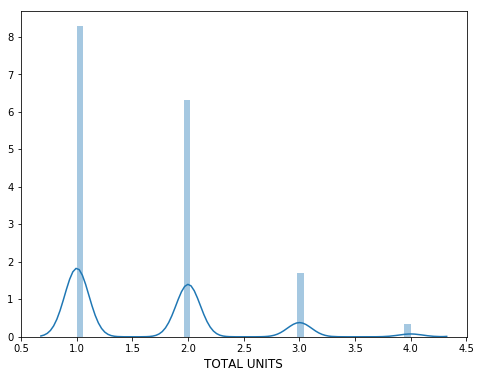

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['TOTAL UNITS'].values, bins=50, kde=True)
plt.xlabel('TOTAL UNITS', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20695 rows and 21 colummns


### <a name="sale-date"></a>Sale Date:

C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


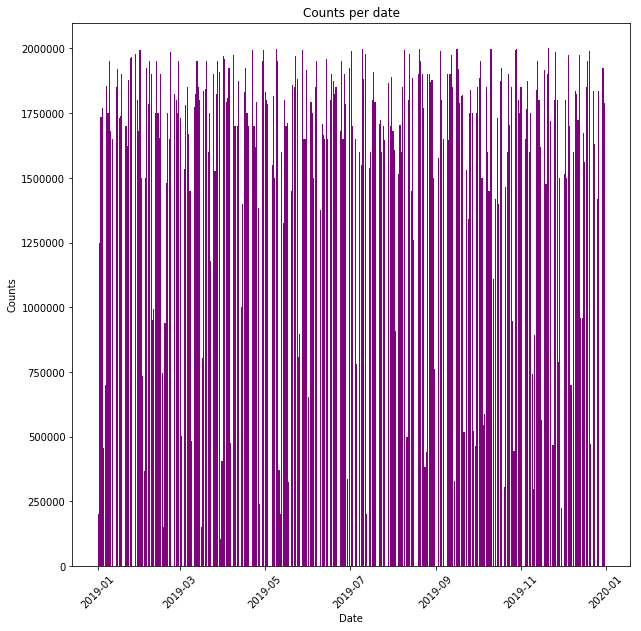

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(df['SALE DATE'].values,
        df['SALE PRICE'].values,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Counts",
       title="Counts per date")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20695 rows and 21 colummns


### <a name="lot"></a>Lot:

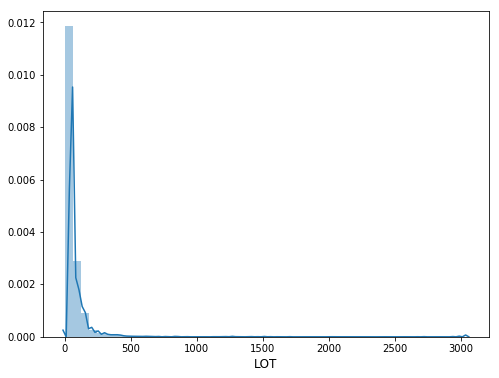

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LOT'].values, bins=50, kde=True)
plt.xlabel('LOT', fontsize=12)
plt.show()

In [ ]:
df = df[df['LOT'] < 300]

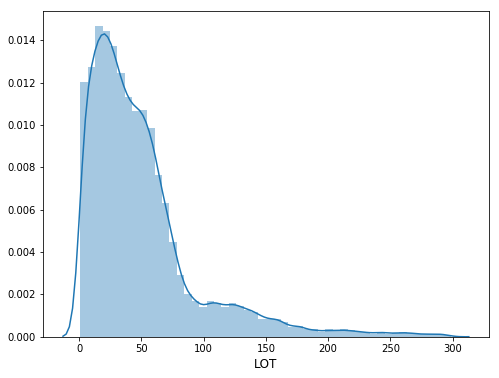

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LOT'].values, bins=50, kde=True)
plt.xlabel('LOT', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20235 rows and 21 colummns


In [ ]:
df = df[df['LOT'] < 200]

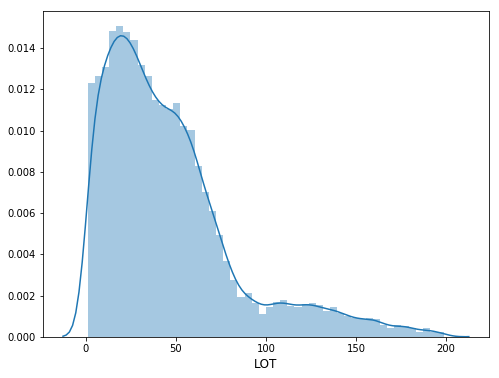

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LOT'].values, bins=50, kde=True)
plt.xlabel('LOT', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 19835 rows and 21 colummns


In [ ]:
df = df[df['LOT'] < 150]

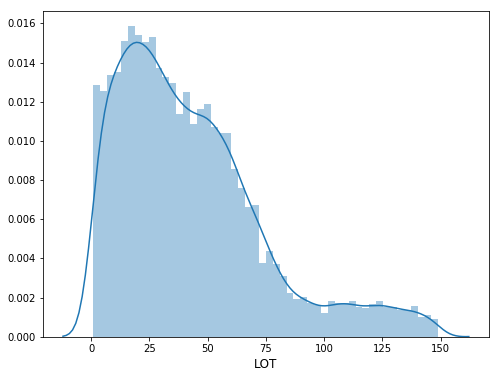

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['LOT'].values, bins=50, kde=True)
plt.xlabel('LOT', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 19304 rows and 21 colummns


### <a name="building-class-category"></a>Building Class Category:

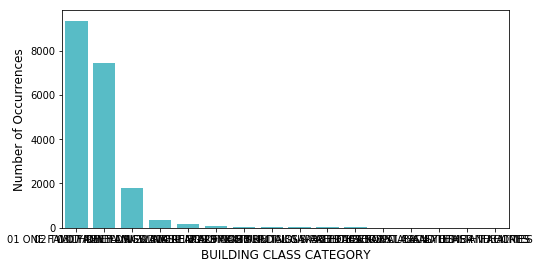

In [ ]:
int_level = df['BUILDING CLASS CATEGORY'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BUILDING CLASS CATEGORY', fontsize=12)
plt.show()

In [ ]:
cnt_srs = df['BUILDING CLASS CATEGORY'].value_counts()
print(cnt_srs)

01 ONE FAMILY DWELLINGS              9346
02 TWO FAMILY DWELLINGS              7449
03 THREE FAMILY DWELLINGS            1791
07 RENTALS - WALKUP APARTMENTS        348
22 STORE BUILDINGS                    153
14 RENTALS - 4-10 UNIT                 60
21 OFFICE BUILDINGS                    47
29 COMMERCIAL GARAGES                  35
37 RELIGIOUS FACILITIES                22
30 WAREHOUSES                          22
27 FACTORIES                           15
33 EDUCATIONAL FACILITIES               8
41 TAX CLASS 4 - OTHER                  3
32 HOSPITAL AND HEALTH FACILITIES       2
38 ASYLUMS AND HOMES                    2
34 THEATRES                             1
Name: BUILDING CLASS CATEGORY, dtype: int64


In [ ]:
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,A1,4445 PARK AVENUE,10457.0,1.0,...,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC


### <a name="tax-class-at-time-of-sale"></a>Tax-class-at-time-of-sale:

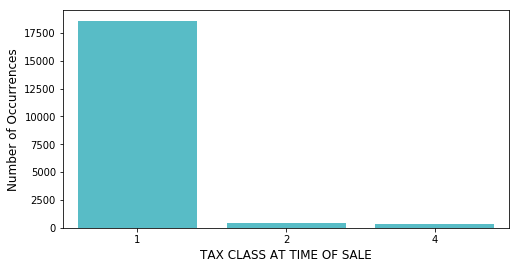

In [ ]:
int_level = df['TAX CLASS AT TIME OF SALE'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TAX CLASS AT TIME OF SALE', fontsize=12)
plt.show()



In [ ]:
cnt_srs = df['TAX CLASS AT TIME OF SALE'].value_counts()
print(cnt_srs)

1    18586
2      408
4      310
Name: TAX CLASS AT TIME OF SALE, dtype: int64


In [ ]:
df.loc[df['TAX CLASS AT TIME OF SALE'] == 4].head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
50,2,BATHGATE,22 STORE BUILDINGS,4,3039,21,K1,2345 WASHINGTON AVENUE,10458.0,0.0,...,1.0,4239.0,4239.0,1931.0,4,K1,1500000,2019-01-10,bronx,2345 WASHINGTON AVENUE NYC
62,2,BATHGATE,30 WAREHOUSES,4,2899,34,E1,407 EAST 174 STREET,10457.0,0.0,...,1.0,3439.0,3320.0,1955.0,4,E1,880000,2019-03-12,bronx,407 EAST 174 STREET NYC
608,2,BAYCHESTER,29 COMMERCIAL GARAGES,4,4728,46,G2,3450 KINGSLAND AVENUE,10469.0,0.0,...,1.0,3971.0,1760.0,1964.0,4,G2,775000,2019-05-23,bronx,3450 KINGSLAND AVENUE NYC


In [ ]:
df.loc[df['TAX CLASS AT TIME OF SALE'] == 2]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
592,2,BAYCHESTER,07 RENTALS - WALKUP APARTMENTS,2A,4736,8,C3,3359 SEYMOUR AVENUE,10469.0,4.0,...,4.0,2567.0,3378.0,1934.0,2,C3,640000,2019-10-31,bronx,3359 SEYMOUR AVENUE NYC
593,2,BAYCHESTER,07 RENTALS - WALKUP APARTMENTS,2A,4762,89,C3,3017 EASTCHESTER ROAD,10469.0,4.0,...,4.0,1180.0,3300.0,1931.0,2,C3,750000,2019-02-15,bronx,3017 EASTCHESTER ROAD NYC
602,2,BAYCHESTER,14 RENTALS - 4-10 UNIT,2A,4762,40,S3,3061 EASTCHESTER ROAD,10469.0,3.0,...,4.0,3129.0,3296.0,1931.0,2,S3,750000,2019-01-15,bronx,3061 EASTCHESTER ROAD NYC
758,2,BEDFORD PARK/NORWOOD,07 RENTALS - WALKUP APARTMENTS,2A,3318,86,C3,2792 MORRIS AVENUE,10468.0,4.0,...,4.0,2381.0,3040.0,1925.0,2,C3,875000,2019-03-28,bronx,2792 MORRIS AVENUE NYC
765,2,BEDFORD PARK/NORWOOD,07 RENTALS - WALKUP APARTMENTS,2A,3336,67,C3,108 EAST 208 STREET,10467.0,4.0,...,4.0,3822.0,3496.0,1925.0,2,C3,800000,2019-10-18,bronx,108 EAST 208 STREET NYC
954,2,BELMONT,07 RENTALS - WALKUP APARTMENTS,2A,3077,49,C3,2473 HUGHES AVENUE,10458.0,4.0,...,4.0,2185.0,4436.0,1925.0,2,C3,1290000,2019-02-01,bronx,2473 HUGHES AVENUE NYC
960,2,BELMONT,07 RENTALS - WALKUP APARTMENTS,2A,3089,49,C3,2333 BEAUMONT AVENUE,10458.0,4.0,...,4.0,3042.0,2000.0,1931.0,2,C3,610000,2019-03-11,bronx,2333 BEAUMONT AVENUE NYC
964,2,BELMONT,07 RENTALS - WALKUP APARTMENTS,2A,3091,31,C3,2501 CAMBRELENG,10458.0,4.0,...,4.0,825.0,2600.0,1931.0,2,C3,799000,2019-11-07,bronx,2501 CAMBRELENG NYC
965,2,BELMONT,07 RENTALS - WALKUP APARTMENTS,2A,3100,13,C3,779 GARDEN STREET,10460.0,4.0,...,4.0,2500.0,3886.0,1905.0,2,C3,896000,2019-07-23,bronx,779 GARDEN STREET NYC
974,2,BELMONT,07 RENTALS - WALKUP APARTMENTS,2A,3105,56,C3,2411 CROTONA AVENUE,10458.0,4.0,...,4.0,2000.0,3350.0,1931.0,2,C3,750000,2019-05-30,bronx,2411 CROTONA AVENUE NYC


### <a name="sale-price"></a>Sale Price:

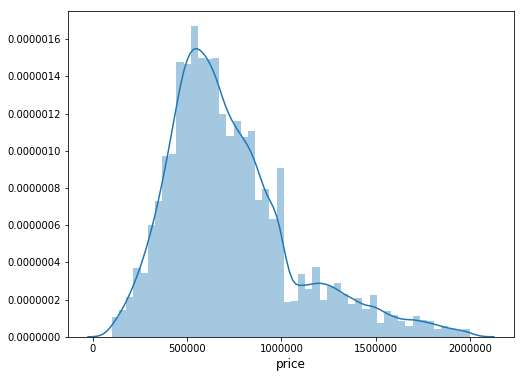

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
cnt_srs = df['SALE PRICE'].value_counts()
print(cnt_srs)

650000     265
600000     230
550000     222
450000     219
800000     217
750000     212
500000     206
700000     206
850000     183
900000     182
400000     172
950000     164
525000     142
1200000    138
575000     134
560000     129
1100000    125
1300000    124
990000     119
580000     117
300000     115
640000     115
630000     114
625000     112
680000     110
725000     110
520000     110
540000     109
610000     108
660000     106
          ... 
324247       1
569999       1
207500       1
418437       1
993900       1
297560       1
739888       1
608800       1
1321500      1
580114       1
613090       1
973586       1
838800       1
904000       1
375950       1
334960       1
844901       1
455751       1
748580       1
101400       1
666588       1
388052       1
322500       1
216000       1
297695       1
703358       1
400250       1
680821       1
1756000      1
329729       1
Name: SALE PRICE, Length: 3128, dtype: int64


In [ ]:
df = df[df['SALE PRICE'] > 300000]

In [ ]:
cnt_srs = df['SALE PRICE']
print(np.sort(cnt_srs))

[ 300202  300500  301000 ... 1999900 1999900 1999999]


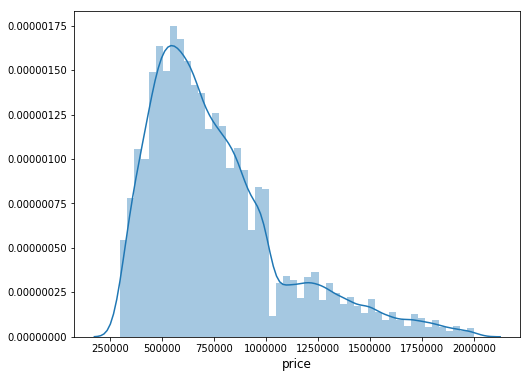

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 18279 rows and 21 colummns


In [ ]:
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,A1,4445 PARK AVENUE,10457.0,1.0,...,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC


### <a name="building-class-at-time-of-sale"></a>Building-class-at-time-of-sale:

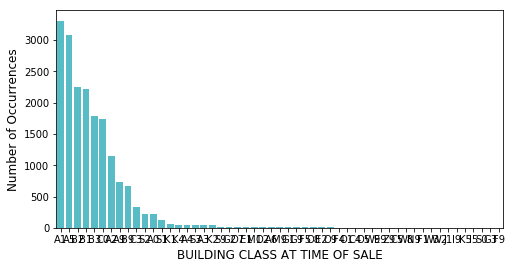

In [ ]:
int_level = df['BUILDING CLASS AT TIME OF SALE'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BUILDING CLASS AT TIME OF SALE', fontsize=12)
plt.show()


In [ ]:
cnt_srs = df['BUILDING CLASS AT TIME OF SALE'].value_counts()
print(cnt_srs)

A1    3310
A5    3084
B2    2250
B1    2213
B3    1784
C0    1745
A2    1146
A9     726
B9     673
C3     327
S2     225
A0     216
S1     124
K1      54
K4      51
A4      49
S3      40
A3      39
K2      38
S9      18
G2      14
O7      13
E1      13
M1      13
O2      11
A6       9
M9       9
G1       8
G9       8
F5       8
O8       7
E2       6
O9       5
F4       4
O1       4
C4       4
O5       4
W9       4
E9       3
Z9       3
C5       3
W8       2
N9       2
F1       1
W3       1
W2       1
J1       1
I9       1
K5       1
I5       1
S0       1
G3       1
F9       1
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64


### <a name="splitting-the-data"></a>Splitting-the-data:

In [ ]:
# split the data into train and test set
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_target = df_train['SALE PRICE']
df_train = df_train.drop(['SALE PRICE'], axis=1)

test_target = df_test['SALE PRICE']
df_test = df_test.drop(['SALE PRICE'], axis=1)


In [ ]:
print(f'Train data has {df_train.shape[0]} rows and {df_train.shape[1]} colummns')
print(f'Test data has {df_test.shape[0]} rows and {df_test.shape[1]} colummns')

Train data has 14623 rows and 20 colummns
Test data has 3656 rows and 20 colummns


In [ ]:
df_train.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,AREA,FINAL_ADDRESS
21545,4,ROSEDALE,02 TWO FAMILY DWELLINGS,1,13728,13,B3,147-09 235TH STREET,11422.0,2.0,0.0,2.0,3800.0,2230.0,1920.0,1,B3,2019-12-26,queens,147-09 235TH STREET NYC
1388,2,CASTLE HILL/UNIONPORT,02 TWO FAMILY DWELLINGS,1,3483,71,B2,324 TORRY AVENUE,10473.0,2.0,0.0,2.0,3981.0,2712.0,2002.0,1,B2,2019-12-13,bronx,324 TORRY AVENUE NYC
9283,4,FLUSHING-SOUTH,03 THREE FAMILY DWELLINGS,1,6419,37,C0,6145 146TH ST,11367.0,3.0,0.0,3.0,3974.0,3220.0,1997.0,1,C0,2019-01-09,queens,6145 146TH ST NYC
14407,4,JAMAICA,02 TWO FAMILY DWELLINGS,1,10029,119,B3,97-30 WALTHAM STREET,11435.0,2.0,0.0,2.0,1600.0,1361.0,1901.0,1,B3,2019-01-25,queens,97-30 WALTHAM STREET NYC
3323,2,MORRISANIA/LONGWOOD,02 TWO FAMILY DWELLINGS,1,2683,115,B2,552 FOX STREET,10455.0,2.0,0.0,2.0,2300.0,2340.0,1990.0,1,B2,2019-02-22,bronx,552 FOX STREET NYC


In [ ]:
df_train.columns.values

array(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE DATE', 'AREA', 'FINAL_ADDRESS'], dtype=object)

In [ ]:
cat = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS'
        , 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'AREA',  'FINAL_ADDRESS']
        

In [ ]:
final=pd.concat([df_train,df_test])

### <a name="cat-to-num"></a>Categorial to Numerical:

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cat:
    lb=LabelEncoder()
    final[col]=lb.fit_transform(final[col].values)
    
    
train=final[:len(df_train)]
test=final[len(df_train):]

In [ ]:
print(f'Train data has {train.shape[0]} rows and {train.shape[1]} colummns')
print(f'Test data has {test.shape[0]} rows and {test.shape[1]} colummns')

Train data has 14623 rows and 20 colummns
Test data has 3656 rows and 20 colummns


In [ ]:
final.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                               int32
BUILDING CLASS CATEGORY                    int32
TAX CLASS AS OF FINAL ROLL 18/19          object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AS OF FINAL ROLL 18/19      int32
ADDRESS                                    int32
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE             int32
SALE DATE                                  int64
AREA                                       int32
FINAL_ADDRESS                              int32
dtype: object

In [ ]:
final['TAX CLASS AS OF FINAL ROLL 18/19'].values

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [ ]:
cnt_srs = final['TAX CLASS AS OF FINAL ROLL 18/19'].value_counts()
print(cnt_srs)

1     17598
2A      390
4       291
Name: TAX CLASS AS OF FINAL ROLL 18/19, dtype: int64


In [ ]:
final['TAX CLASS AS OF FINAL ROLL 18/19'] = final['TAX CLASS AS OF FINAL ROLL 18/19'].map({'2A': 2, '1': 1, '4' : 4})

In [ ]:
cnt_srs = final['TAX CLASS AS OF FINAL ROLL 18/19'].value_counts()
print(cnt_srs)

1    17598
2      390
4      291
Name: TAX CLASS AS OF FINAL ROLL 18/19, dtype: int64


In [ ]:
final.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                               int32
BUILDING CLASS CATEGORY                    int32
TAX CLASS AS OF FINAL ROLL 18/19           int64
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AS OF FINAL ROLL 18/19      int32
ADDRESS                                    int32
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE             int32
SALE DATE                                  int64
AREA                                       int32
FINAL_ADDRESS                              int32
dtype: object

In [ ]:
train=final[:len(df_train)]
test=final[len(df_train):]

In [ ]:
print(f'Train data has {train.shape[0]} rows and {train.shape[1]} colummns')
print(f'Test data has {test.shape[0]} rows and {test.shape[1]} colummns')

Train data has 14623 rows and 20 colummns
Test data has 3656 rows and 20 colummns


### <a name="scaling"></a>Scaling:

In [ ]:
for col in train.columns:     
  minmax=MinMaxScaler()
  train[col] = minmax.fit_transform(train[col].values.reshape(-1,1))
  test[col]=minmax.transform(test[col].values.reshape(-1,1))

C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\aavivi\AppData\Local\Continuum\anaconda

In [ ]:
train.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,AREA,FINAL_ADDRESS
21545,0.75,0.802956,0.066667,0.0,0.841350,0.081081,0.192308,0.235613,0.838480,0.50,0.0,0.333333,0.743171,0.458429,0.214286,0.0,0.192308,0.989865,0.75,0.235613
1388,0.25,0.167488,0.066667,0.0,0.212822,0.472973,0.173077,0.586769,0.274941,0.50,0.0,0.333333,0.782104,0.569132,0.865079,0.0,0.173077,0.956081,0.00,0.586769
9283,0.75,0.344828,0.133333,0.0,0.392945,0.243243,0.230769,0.785563,0.805819,0.75,0.0,0.666667,0.780598,0.685806,0.825397,0.0,0.230769,0.023649,0.75,0.785563
14407,0.75,0.492611,0.066667,0.0,0.614417,0.797297,0.192308,0.991228,0.846200,0.50,0.0,0.333333,0.269951,0.258842,0.063492,0.0,0.192308,0.064189,0.75,0.991228
3323,0.25,0.615764,0.066667,0.0,0.163742,0.770270,0.173077,0.746899,0.264252,0.50,0.0,0.333333,0.420521,0.483693,0.769841,0.0,0.173077,0.148649,0.00,0.746899


### <a name="RFRegressor-model"></a>RFRegressor-model:

In [ ]:
rf=RandomForestRegressor(n_estimators=300,verbose=True,max_depth=10, n_jobs=-1)
rf.fit(train, train_target)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=True,
           warm_start=False)

In [ ]:
res_pred = rf.predict(test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished


In [ ]:
print(type(res_pred))
new_series = pd.Series(res_pred)
print(new_series)

<class 'numpy.ndarray'>
0       1.061477e+06
1       9.605408e+05
2       5.651272e+05
3       8.861808e+05
4       7.589140e+05
5       9.969047e+05
6       5.003053e+05
7       5.622022e+05
8       1.299670e+06
9       5.694456e+05
10      8.088018e+05
11      4.890615e+05
12      5.121659e+05
13      5.112792e+05
14      8.796440e+05
15      9.550786e+05
16      1.043955e+06
17      6.441923e+05
18      6.575113e+05
19      5.432305e+05
20      6.771557e+05
21      1.036106e+06
22      8.029804e+05
23      5.921902e+05
24      7.448302e+05
25      7.362453e+05
26      5.610904e+05
27      5.875306e+05
28      1.042804e+06
29      7.736449e+05
            ...     
3626    5.596004e+05
3627    5.107968e+05
3628    6.766278e+05
3629    8.061006e+05
3630    5.555545e+05
3631    7.296530e+05
3632    8.824835e+05
3633    1.206935e+06
3634    4.248738e+05
3635    9.785184e+05
3636    8.727188e+05
3637    8.654937e+05
3638    5.780953e+05
3639    5.199376e+05
3640    5.247086e+05
3641    6.

In [ ]:
print(type(test_target))
print(test_target)


<class 'pandas.core.series.Series'>
17088    1135000
1163      725000
13718     695000
17453     499000
20292     670947
9121      905000
160       456300
1374      645000
16289    1265000
14069     525000
25962    1081688
7463      444000
5694      340000
6061      531000
16808     870000
7310     1200000
15796    1142500
3525      680000
3192     1050000
21281     350000
6899      775250
2608      815000
13534     875000
5908      770000
24059     560000
12422     875000
3587      416000
466       330000
6550     1500000
4508     1170000
          ...   
19717     530000
18471     547000
16866     567500
9010      810000
7365      445000
1828      730000
25546    1409600
6407     1235000
8262      440000
23020    1321500
25422     815000
13389     850000
6905      520000
5067      505000
7189      625000
6194      610000
6771      680821
7689      525000
5587      900000
10913     475000
7656      380000
13185     460000
11654    1200000
2334      465000
23071    1200000
21943     40

In [ ]:
rms = np.sqrt(mean_squared_error(test_target, res_pred))
print(rms)

202407.7081118306


In [ ]:
import lightgbm as lgb

lgbm=lgb.LGBMRegressor(max_depth=15, n_leaves=40)
lgbm.fit(train, train_target)


ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
res_pred = lgbm.predict(test)

In [ ]:
rms = np.sqrt(mean_squared_error(test_target, res_pred))
print(rms)

In [ ]:
import xgboost as xgb

In [ ]:
final.head(1)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(train,train_target)

preds = xg_reg.predict(test)

In [ ]:
rmse = np.sqrt(mean_squared_error(test_target, preds))
print("RMSE: %f" % (rmse))